I will analyze cab_data to find which company would be better to invest.


In [19]:
import numpy as np
import matplotlib.pyplot  as plt
import seaborn as sns
import pandas as pd 
import plotly.express as px
import plotly.graph_objs as go


Cab_Data = pd.read_csv('../input/dataset1/Cab_Data.csv')
Customer_Data = pd.read_csv('../input/dataset1/Customer_ID.csv')
Transactiond = pd.read_csv('../input/dataset1/Transaction_ID.csv')
City_Data = pd.read_csv('../input/dataset1/City.csv')

Cab_Data.info()
Customer_Data.info()
Transactiond.info()
City_Data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 359392 entries, 0 to 359391
Data columns (total 7 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   Transaction ID  359392 non-null  int64  
 1   Date of Travel  359392 non-null  int64  
 2   Company         359392 non-null  object 
 3   City            359392 non-null  object 
 4   KM Travelled    359392 non-null  float64
 5   Price Charged   359392 non-null  float64
 6   Cost of Trip    359392 non-null  float64
dtypes: float64(3), int64(2), object(2)
memory usage: 19.2+ MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49171 entries, 0 to 49170
Data columns (total 4 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Customer ID         49171 non-null  int64 
 1   Gender              49171 non-null  object
 2   Age                 49171 non-null  int64 
 3   Income (USD/Month)  49171 non-null  int64 
dtypes: int64(3),

I start with importing data and and libraries 

Now I will process data

In [15]:
Cab_Data = Cab_Data.rename(columns = {'Date of Travel': 'Date'})
mergedata = Cab_Data.merge(Transactiond, on= 'Transaction ID').merge(Customer_Data, on ='Customer ID').merge(City_Data, on = 'City')
mergedata = mergedata.rename(columns = {'Transaction ID': 'TransactionID'})
mergedata = mergedata.rename(columns = {'Customer ID': 'CustomerID'})
mergedata = mergedata.rename(columns = {'Cost of Trip': 'CostofTrip'})

There is serious problem with ''Date of Travel'data . After eleborated study, I used above fromula to catch the date.

In [16]:
y = mergedata['Date'].max()
mergedata[['Date']] = (y-mergedata[['Date']])
mergedata['Date'] = pd.to_datetime(mergedata['Date'], unit='D', origin='2016-01-31')
mergedata = mergedata.loc[(mergedata['Date'] >= '2016-01-31')
                     & (mergedata['Date'] <= '2018-12-31')]

mergedata['Year'] = mergedata['Date'].dt.year


Now I will analyze data.
I will find answer for these questions
*      1- What is the profit generated by these two companies?( which one generate more?)
*      2- What is the profit generated per km by these two companies?
*      3- Which company have more ride and more profit?
*      4- What are gender and age distribution of costumers?
*      5- What is the market share of the companies in different years (2016-2017)?
*      6- what is the number of users of each companies in cities?
*      7- what is market share of companies in the cities?

*  1- What is the profit generated by these two companies?
*  2- What is the profit generated per km by these two companies?
*  For these question I will use histogram and I will see which copmany had more profit and most improtantly wihch one got more profit per km.

<class 'pandas.core.frame.DataFrame'>
Int64Index: 355032 entries, 1 to 359391
Data columns (total 18 columns):
 #   Column              Non-Null Count   Dtype         
---  ------              --------------   -----         
 0   TransactionID       355032 non-null  int64         
 1   Date                355032 non-null  datetime64[ns]
 2   Company             355032 non-null  object        
 3   City                355032 non-null  object        
 4   KM Travelled        355032 non-null  float64       
 5   Price Charged       355032 non-null  float64       
 6   CostofTrip          355032 non-null  float64       
 7   CustomerID          355032 non-null  int64         
 8   Payment_Mode        355032 non-null  object        
 9   Gender              355032 non-null  object        
 10  Age                 355032 non-null  int64         
 11  Income (USD/Month)  355032 non-null  int64         
 12  Population          355032 non-null  object        
 13  Users               355032 no

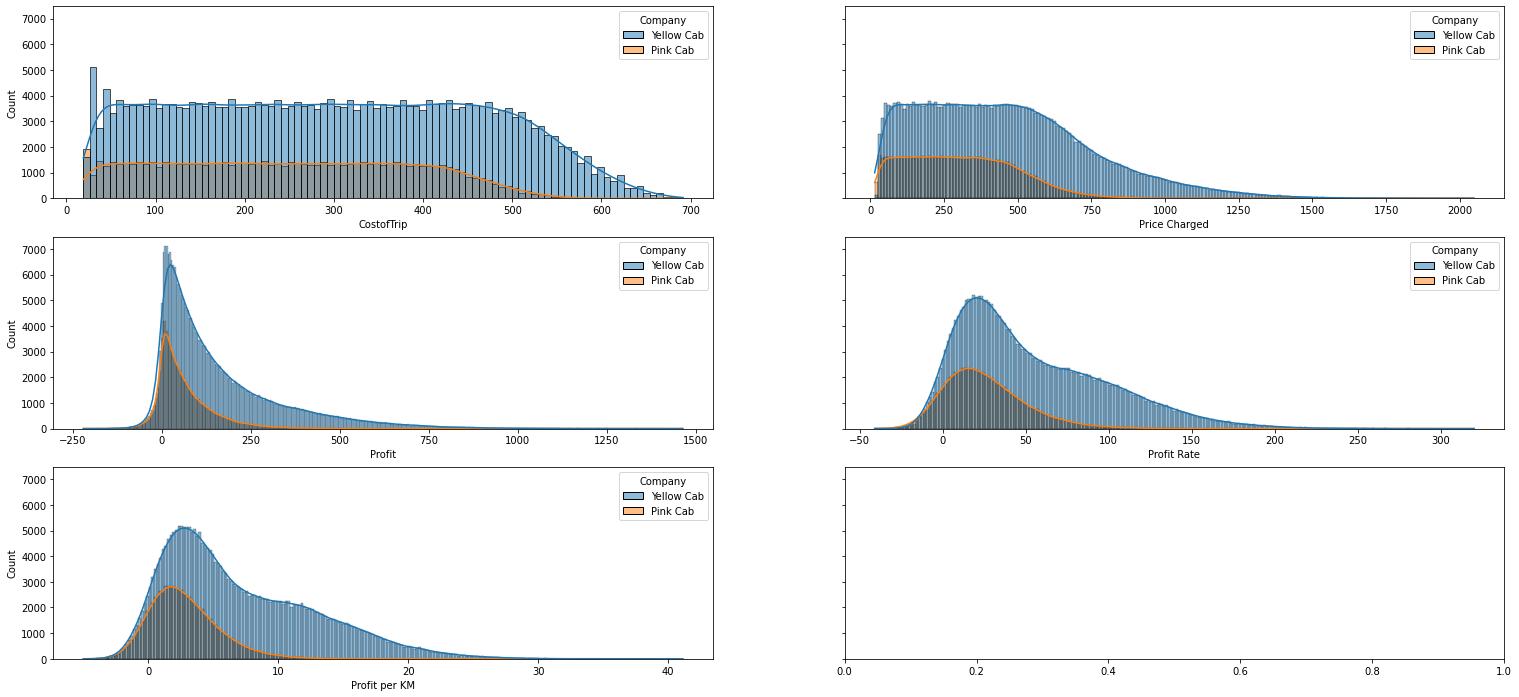

In [17]:
mergedata['Profit'] = mergedata['Price Charged'] - mergedata['CostofTrip']
mergedata['Profit Rate'] = ((mergedata['Price Charged'] - mergedata['CostofTrip'])/mergedata['CostofTrip'])*100
mergedata['Profit per KM'] = mergedata['Profit']/ mergedata['KM Travelled']
mergedata.info()


fig,axes = plt.subplots(3, 2 , figsize=(26,12), sharey=True)

sns.histplot(ax=axes[0,0], data=mergedata, x='CostofTrip' , kde = True , hue="Company")
sns.histplot(ax=axes[0,1], data=mergedata, x='Price Charged' , kde = True , hue="Company")
sns.histplot(ax=axes[1,0], data=mergedata, x='Profit' , kde = True , hue="Company") 
sns.histplot(ax=axes[1,1], data=mergedata, x='Profit Rate' , kde = True , hue="Company")
sns.histplot(ax=axes[2,0], data=mergedata, x='Profit per KM' , kde = True , hue="Company")

fig.show()
 


From the output it can be infered that Yellow copmany generate more profit than Pink.
It is also remarkable that Yellow Cab profit per km is higher than Pink Cab.

*  3- Which company have more ride and more profit?
*  This question is important because we cab see the operations of these companies and compare it with their profit.

In [20]:
profit = mergedata.groupby(['Company']).Profit.sum()
y= profit.to_frame()
ride = mergedata.groupby(['Company']).TransactionID.count()
x= ride.to_frame()
z= y.merge(x, on= 'Company').astype(int)
z = z.rename(columns = {'TransactionID': 'Rides'})
z['profit per ride'] = z.Profit/z.Rides
print(z)

              Profit   Rides  profit per ride
Company                                      
Pink Cab     5237540   83825        62.481837
Yellow Cab  43251775  271207       159.478830


On the basis of outcome, it can be seen that Yellow Cab has advantageous position in terms of profit since its profit per ride is higher.

* 4-What are gender and age distribution of costumers?
* It would be benefical to analyze is there any important info about the profile of users. I will do it on the basis of Gender and AGE

"""GENDER"""


In [21]:
cab_gender = mergedata.groupby(['Company', 'Gender', 'Payment_Mode'], as_index=False).sum()


f = px.bar(cab_gender, x="Gender", y="Profit", color="Company", barmode="group",
             color_discrete_map={'Yellow Cab':'gold', 'Pink Cab':'pink'},
             title = "Profit  by Gender.")
f.update_layout(title_x=0.5)

f.show()

There is not huge difference between users of compaines in terms of  the gender distribution

"""AGE"""

In [22]:
cab_age = mergedata
ages = px.box(cab_age, y="Age", title = "Age Data")
ages.update_layout(title_x=0.5)
ages.show()

Cabs are generally used by middle and young age groups. Neither Gender nor Age are beficial criteria for investment

*  5- What is the market share of the companies in different years?
*  Share of companies in the market (yearly basis) is much more importat variable since it would also help us to change over years 

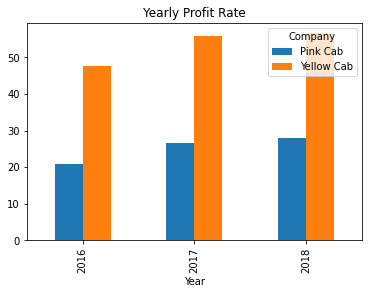

In [24]:

YearlyProfitRate = mergedata.groupby(['Year','Company']).Profit.sum().unstack()/mergedata.groupby(['Year','Company']).CostofTrip.sum().unstack()*100



ax = YearlyProfitRate.plot(kind='bar',stacked = False, title = 'Yearly Profit Rate')
plt.show()


From the bar graph it can be seen that Yellow generates more profit each year

*  6- What is the number of users of each companies in cities?
* Becouse we have data of cities, we can use it to assess users and profit on the basis of cities

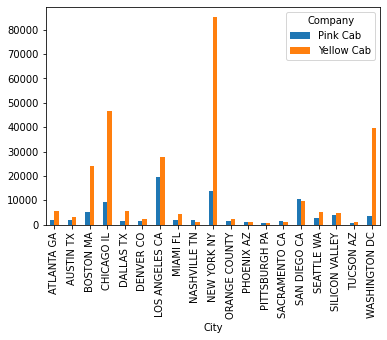

In [25]:
data2_0 = mergedata.groupby(["City", "Company"]).CustomerID.count().unstack()
ax = data2_0.plot(kind='bar',stacked = False)
plt.show()

From the graph we can see that in the most of cities Yellow Cab users outnumbered the Pink Cab.
It can also be seen Yellow Cab has considerable poeration in every cities.
So we can say that Yellow Cab have much more users in most of cities.

*  7- what is market share of companies in the cities?
*  Since  city data significant source to see the operation of companies, it can be also deployed to see market share of companies in terms of users

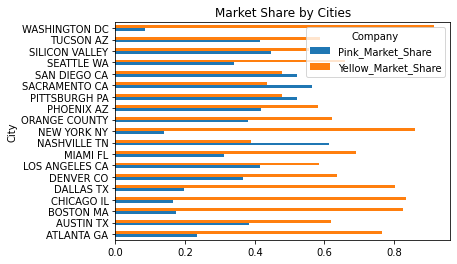

In [26]:
Company_Transaction = mergedata.groupby(['City','Company']).TransactionID.count().unstack()

Company_Transaction['City_Market'] = Company_Transaction['Pink Cab'] + Company_Transaction['Yellow Cab']
Company_Transaction['Pink_Market_Share'] = Company_Transaction['Pink Cab']/Company_Transaction['City_Market']
Company_Transaction['Yellow_Market_Share'] = Company_Transaction['Yellow Cab']/Company_Transaction['City_Market']
ax = Company_Transaction.iloc[:,3:5].plot(kind='barh',stacked = False, title = 'Market Share by Cities')
plt.show()

We can see from the result that except for four cities Yellow Cab dominates all cities.

Finally,
I can be inferred from analysis  that Yellow Cub is the most profitable company between 2016 and 2018.
Moreover, on the basis of the size of operation and number of users Yellow  Cab is bigger.
Therefore Yellow Cub is the best choice for investment.
